In [4]:
import pandas as pd
import os
import re


#Nous ouvrons le dataset
df_ACE = pd.read_csv(os.path.join(r"comptages-routiers-permanents_ACE.csv"), sep=";")
df_Sts = pd.read_csv(os.path.join(r"comptages-routiers-permanents_Sts.csv"), sep=";")
df_convention = pd.read_csv(os.path.join(r"comptages-routiers-permanents_convention.csv"), sep=";")
#print(df_ACE.head())

df_set = (df_ACE, df_Sts, df_convention)
tagg = ["Champs Elysées", "Sts-Pères", "Convention"]

def clean_date(date):
    
    date = re.sub('T', ' ', date)
    date=date[:-6]
    return date

#compte_1=df_ACE.groupby("Etat arc")["Date et heure de comptage"].nunique()
for df in (df_ACE, df_Sts, df_convention):
    df['Date et heure de comptage'] = df['Date et heure de comptage'].apply(lambda s : clean_date(s))

#df_convention['Date et heure de comptage'] = df_convention['Date et heure de comptage'].apply(lambda s : clean_date(s))
#df_Sts['Date et heure de comptage'] = df_Sts['Date et heure de comptage'].apply(lambda s : clean_date(s))

#Nous adaptons notre features "Date" au format d'une série temporelle

for df in (df_ACE, df_Sts, df_convention):
    df['Date et heure de comptage']= pd.to_datetime(df["Date et heure de comptage"], format='%Y-%m-%d %H:%M:%S')
 
    
for df in (df_ACE, df_Sts, df_convention):
    df.sort_values("Date et heure de comptage",inplace = True)
    print(df.head())

#Nous indiquons que la série temporelle est indexée selon la date


df_ACE = df_ACE.set_index('Date et heure de comptage')
df_convention = df_convention.set_index('Date et heure de comptage')
df_Sts = df_Sts.set_index('Date et heure de comptage')
    
print(df_ACE.index)
print(df_Sts.index)
print(df_convention.index)

#Nous créons plusieurs colonnes permettant de situer la donnée par jour/mois/année. Cela nous servira pa la suite pour traiter
#la données selon différentes échelles temporelles.

df_ACE['Year'] = df_ACE.index.year
df_ACE['Month'] = df_ACE.index.month
df_ACE['Weekday Name'] = df_ACE.index.weekday
df_ACE['Hour'] = df_ACE.index.hour

df_convention['Year'] = df_convention.index.year
df_convention['Month'] = df_convention.index.month
df_convention['Weekday Name'] = df_convention.index.weekday
df_convention['Hour'] = df_convention.index.hour

df_Sts['Year'] = df_Sts.index.year
df_Sts['Month'] = df_Sts.index.month
df_Sts['Weekday Name'] = df_Sts.index.weekday
df_Sts['Hour'] = df_Sts.index.hour

print(df_Sts.head())

      Identifiant arc            Libelle Date et heure de comptage  \
6712             4264  AV_Champs_Elysees       2019-11-01 04:00:00   
6713             4264  AV_Champs_Elysees       2019-11-01 05:00:00   
6714             4264  AV_Champs_Elysees       2019-11-01 06:00:00   
2607             4264  AV_Champs_Elysees       2019-11-01 07:00:00   
2608             4264  AV_Champs_Elysees       2019-11-01 08:00:00   

      Débit horaire  Taux d'occupation Etat trafic  Identifiant noeud amont  \
6712          746.0           10.98889      Fluide                     2294   
6713          549.0            7.40722      Fluide                     2294   
6714          503.0            7.66667      Fluide                     2294   
2607          500.0            4.75500      Fluide                     2294   
2608          525.0            5.37389      Fluide                     2294   

               Libelle noeud amont  Identifiant noeud aval  \
6712  Av_Champs_Elysees-Washington        

In [5]:
for df in (df_ACE, df_Sts, df_convention):
    df.drop(columns=["Libelle noeud aval","Libelle noeud amont","Libelle","Identifiant noeud aval","Identifiant noeud amont"], inplace = True)
    print(df.head())

                           Identifiant arc  Débit horaire  Taux d'occupation  \
Date et heure de comptage                                                      
2019-11-01 04:00:00                   4264          746.0           10.98889   
2019-11-01 05:00:00                   4264          549.0            7.40722   
2019-11-01 06:00:00                   4264          503.0            7.66667   
2019-11-01 07:00:00                   4264          500.0            4.75500   
2019-11-01 08:00:00                   4264          525.0            5.37389   

                          Etat trafic  Etat arc Date debut dispo data  \
Date et heure de comptage                                               
2019-11-01 04:00:00            Fluide  Invalide            2005-01-01   
2019-11-01 05:00:00            Fluide  Invalide            2005-01-01   
2019-11-01 06:00:00            Fluide  Invalide            2005-01-01   
2019-11-01 07:00:00            Fluide  Invalide            2005-01-01   
2

                           Identifiant arc  Débit horaire  Taux d'occupation  \
Date et heure de comptage                                                      
2019-11-01 04:00:00                   4264          746.0           10.98889   
2019-11-01 05:00:00                   4264          549.0            7.40722   
2019-11-01 06:00:00                   4264          503.0            7.66667   
2019-11-01 07:00:00                   4264          500.0            4.75500   
2019-11-01 08:00:00                   4264          525.0            5.37389   

                          Etat trafic  Etat arc Date debut dispo data  \
Date et heure de comptage                                               
2019-11-01 04:00:00            Fluide  Invalide            2005-01-01   
2019-11-01 05:00:00            Fluide  Invalide            2005-01-01   
2019-11-01 06:00:00            Fluide  Invalide            2005-01-01   
2019-11-01 07:00:00            Fluide  Invalide            2005-01-01   
2

[]

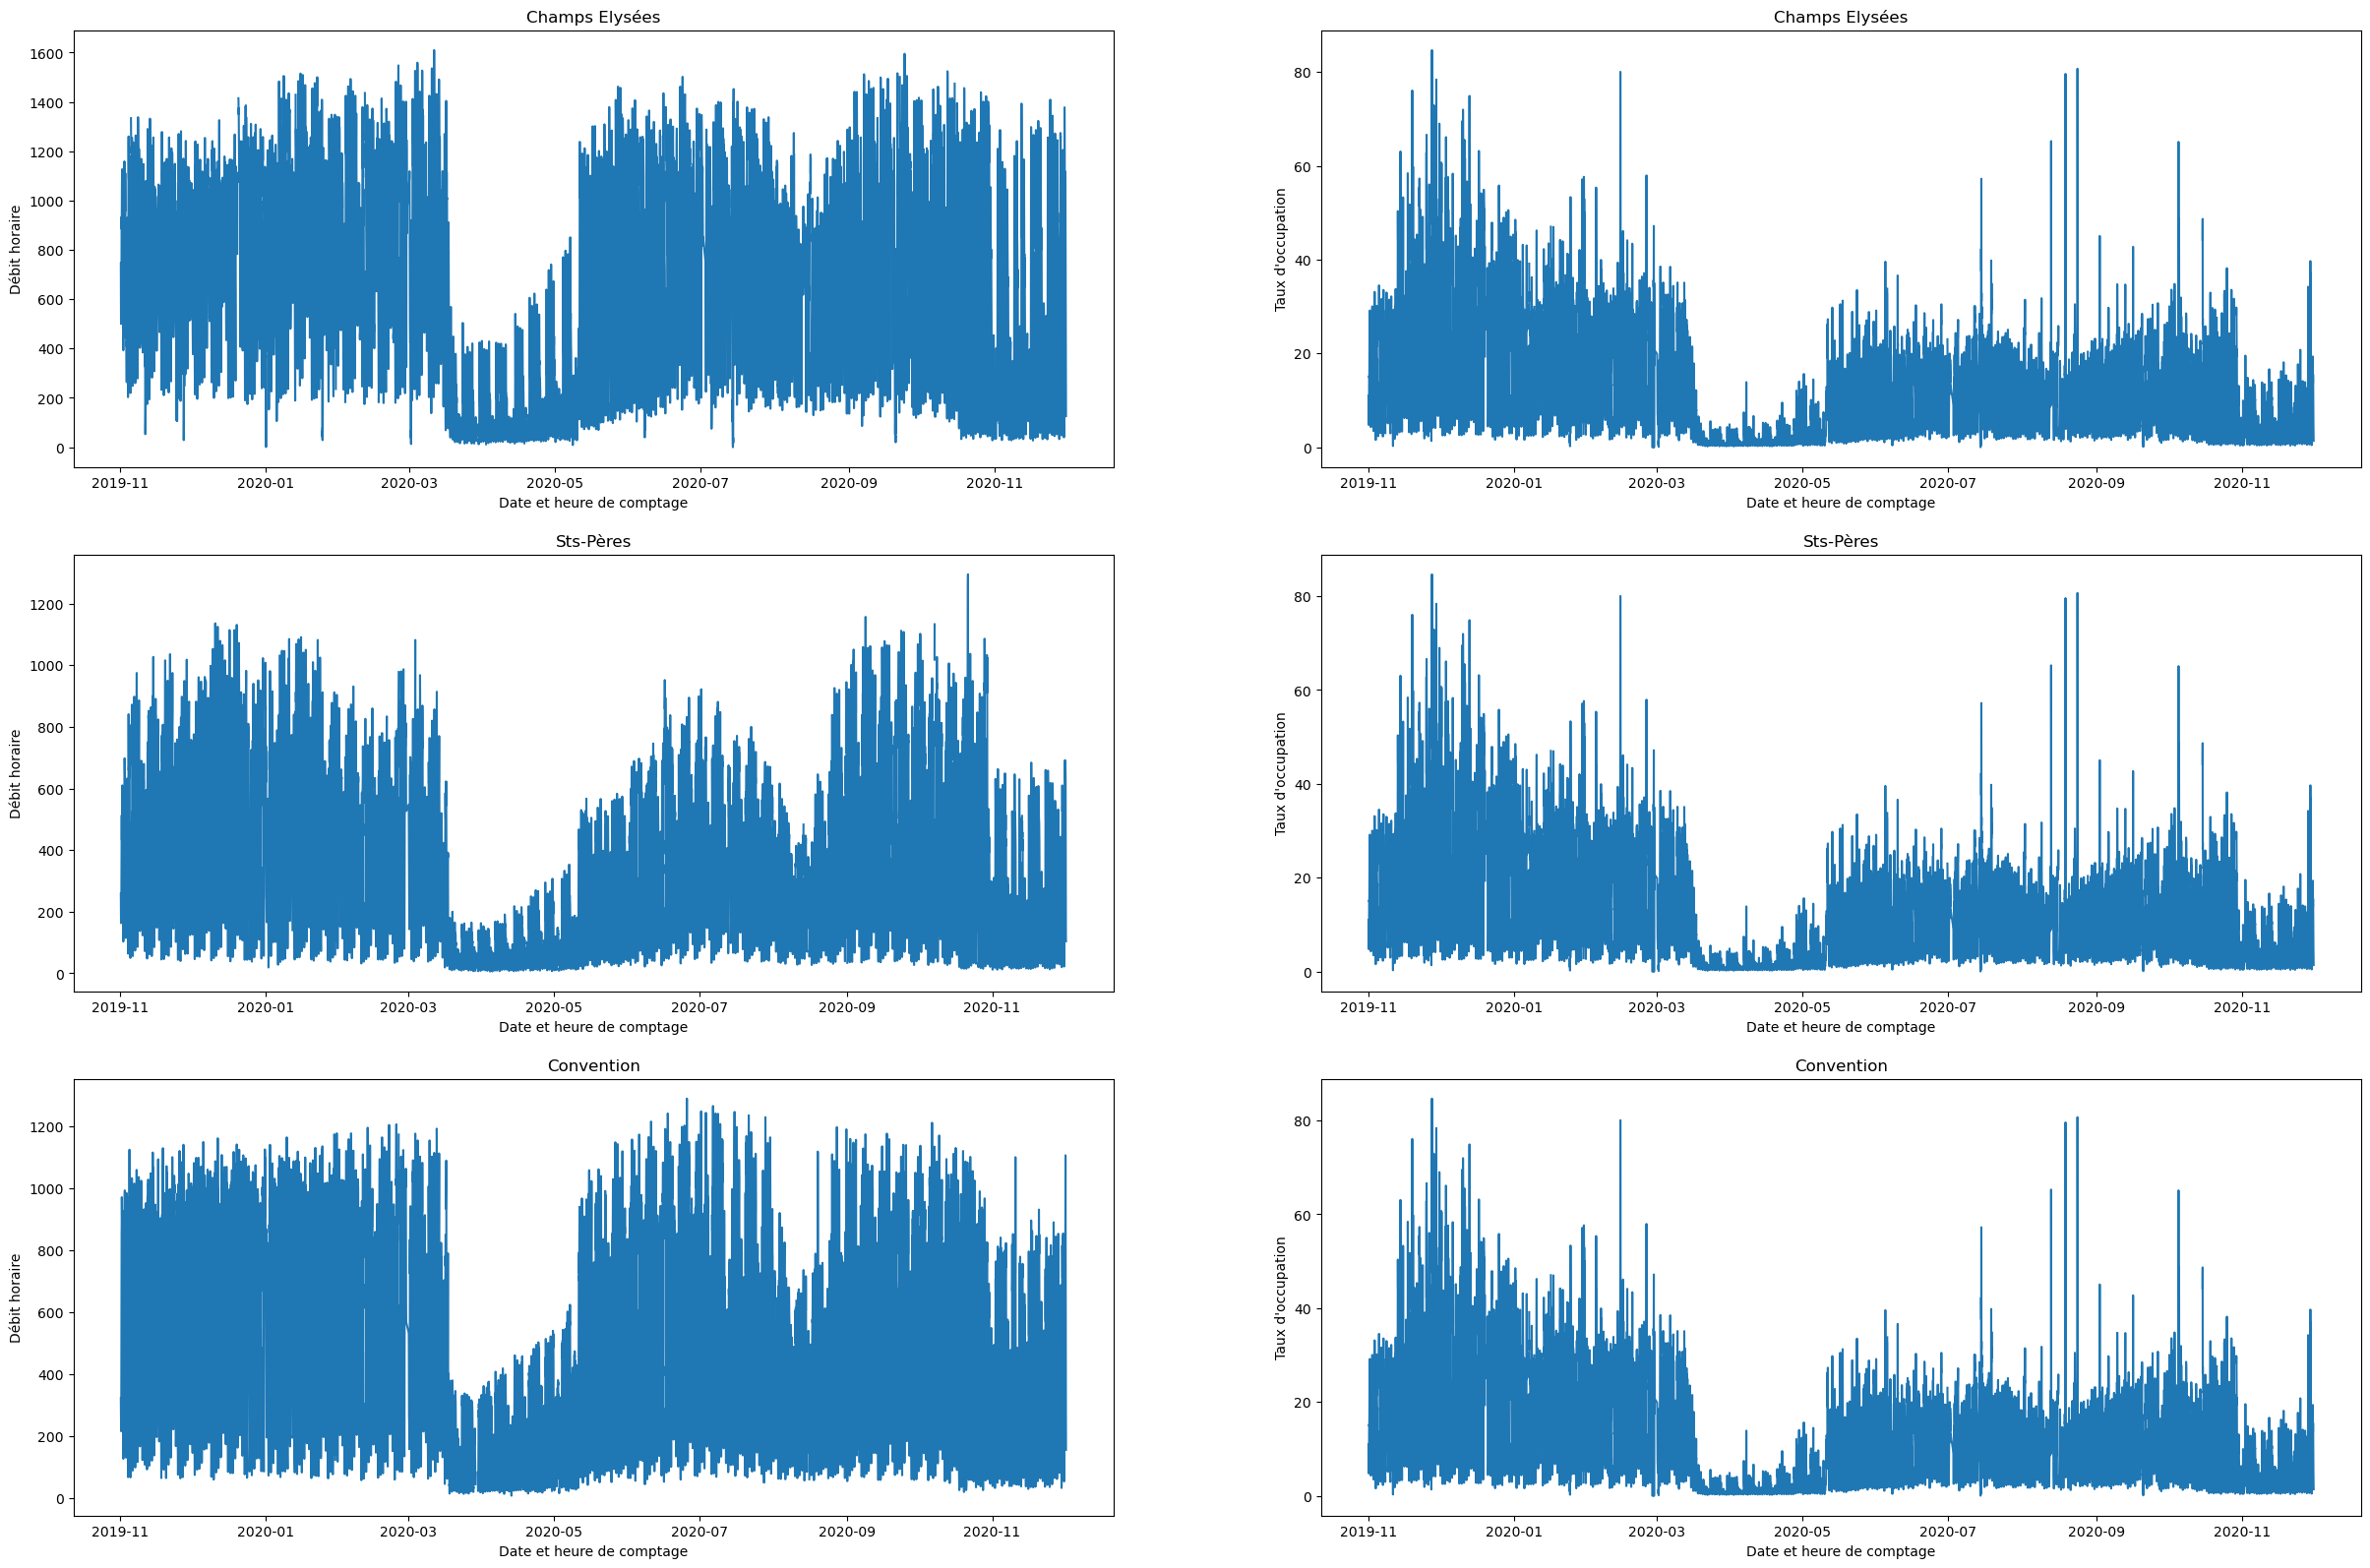

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#Nous commençons par représenter simplement la série temporelle complète.
fig, axes = plt.subplots(ncols=2, nrows=len(df_set), figsize=(30,20), dpi=100)
for i,df in enumerate((df_ACE, df_Sts, df_convention)):
    print(df.head())
    sns.lineplot(x=df.index,y=df["Débit horaire"], ax = axes[i][0])
    sns.lineplot(x=df_ACE.index,y=df_ACE["Taux d'occupation"], ax = axes[i][1])
    axes[i][0].set_title(tagg[i])
    axes[i][1].set_title(tagg[i])
plt.plot()

[]

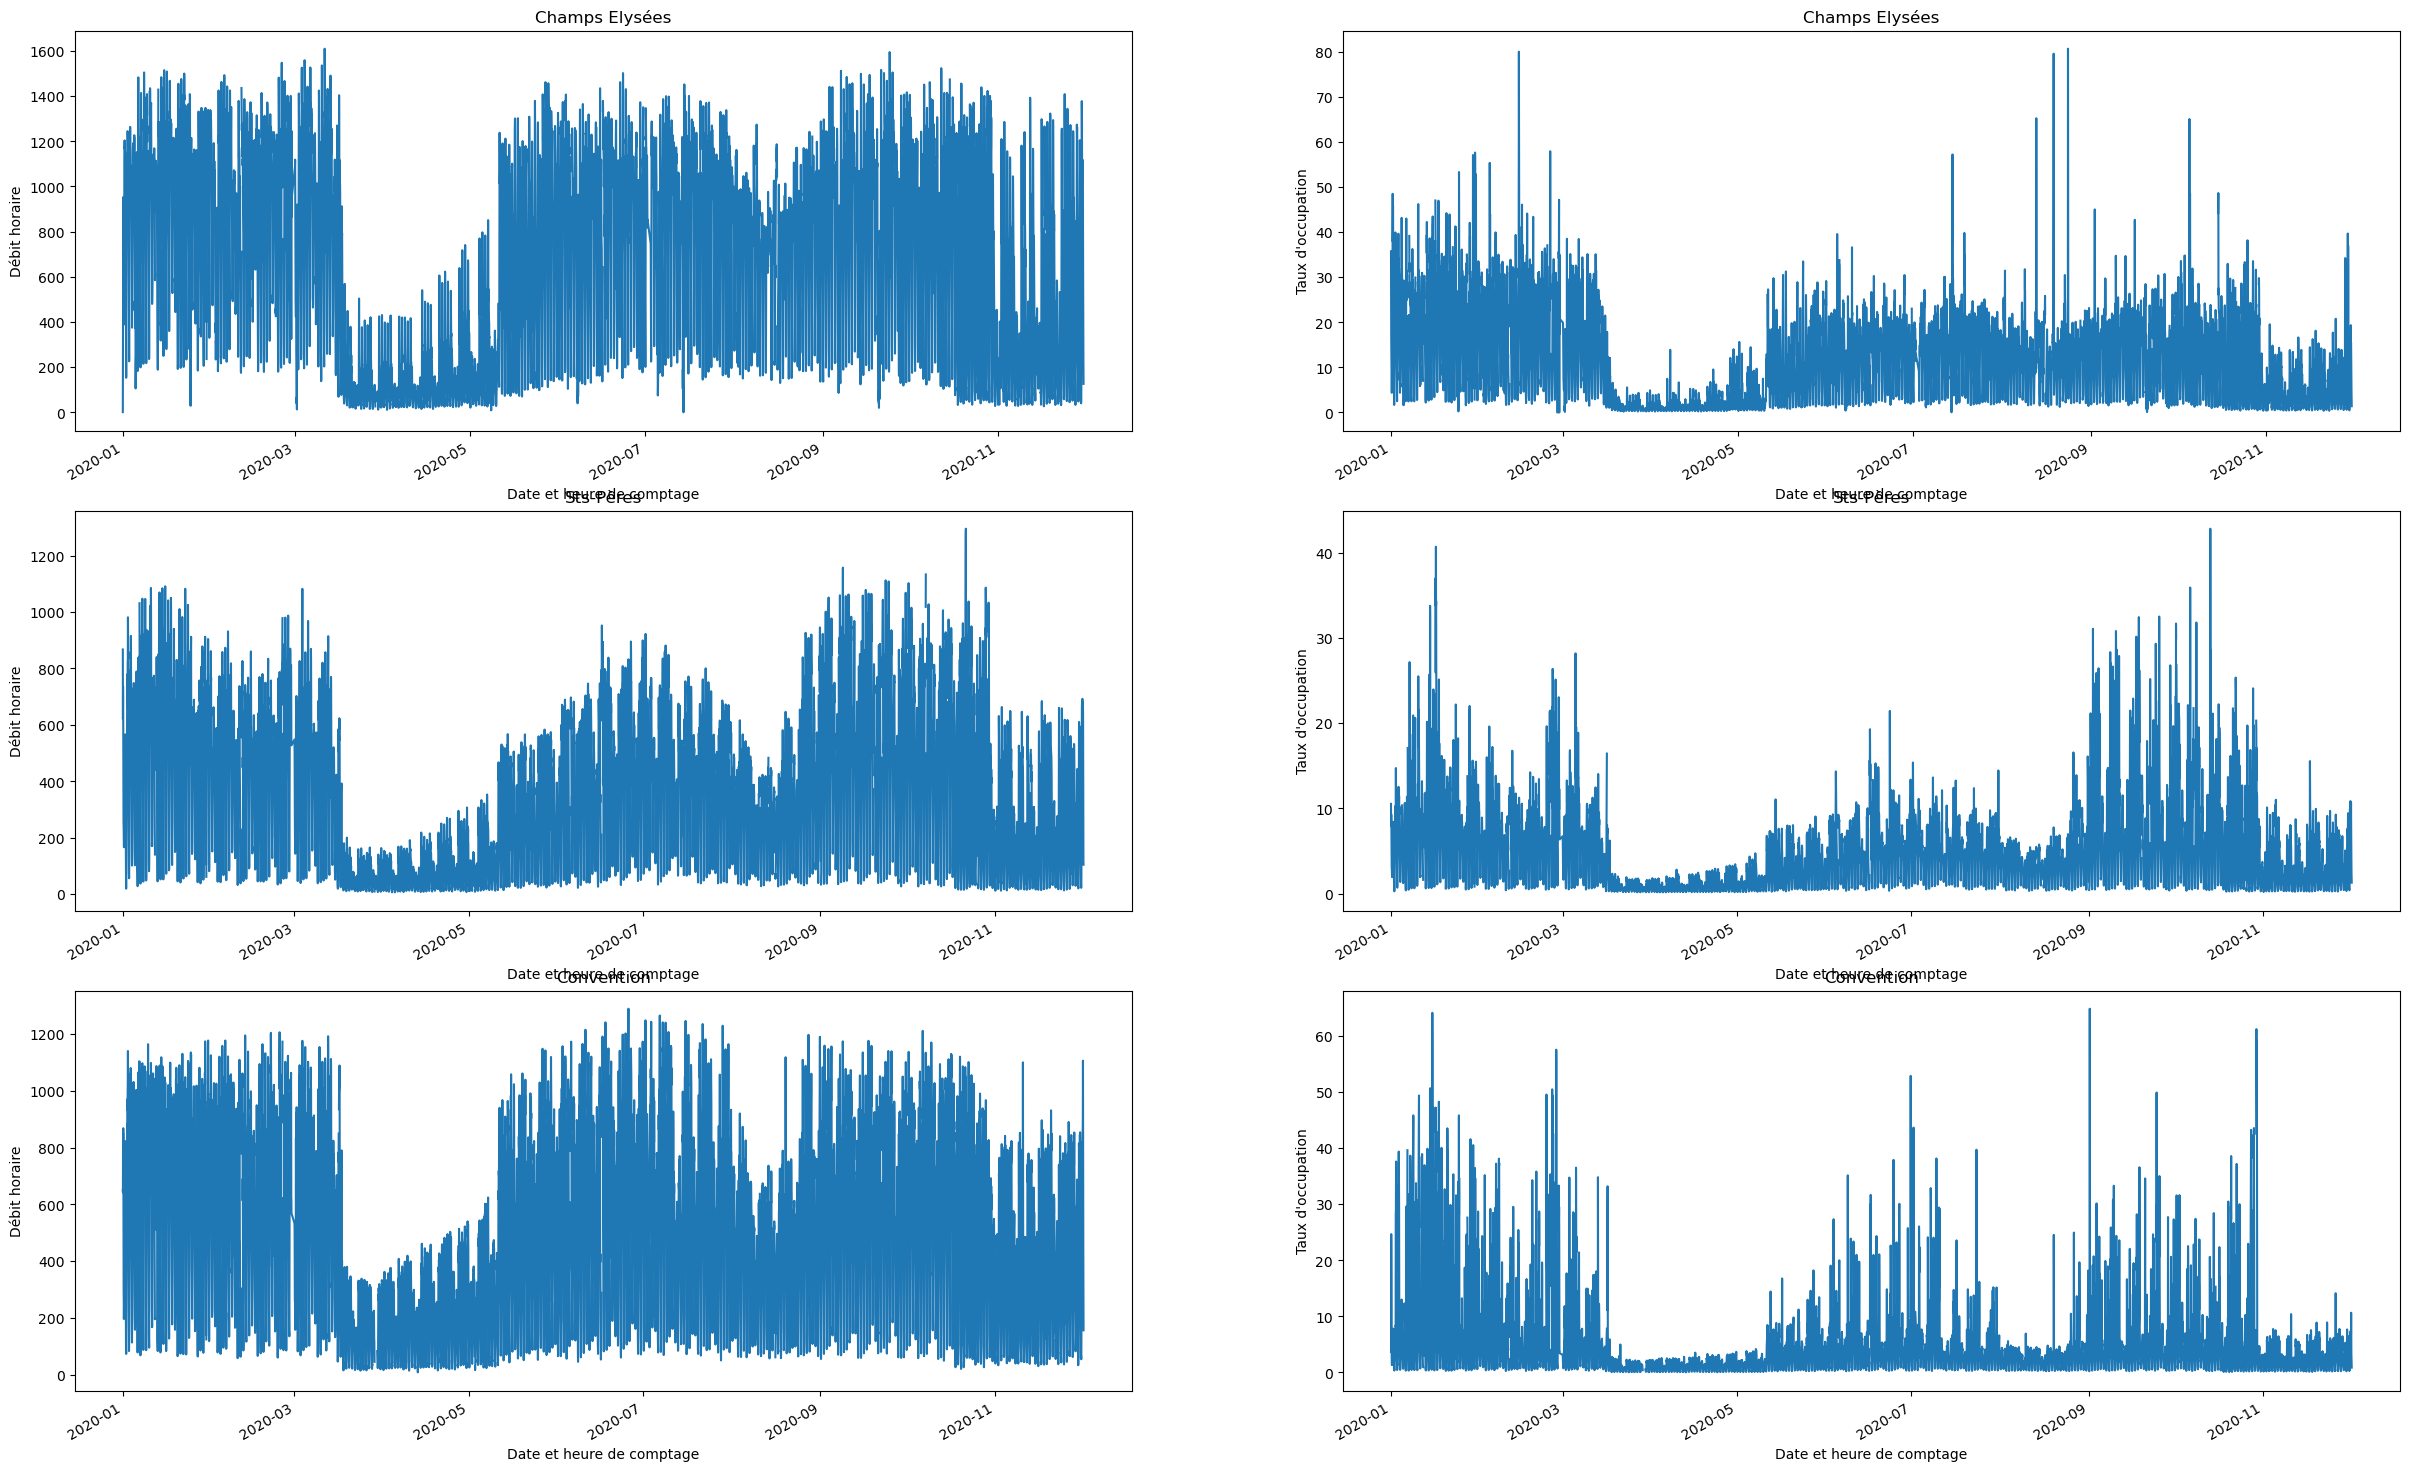

In [7]:
fig, axes = plt.subplots(ncols=2, nrows=len(df_set), figsize=(30, 20), dpi=100)
for i,df in enumerate((df_ACE, df_Sts, df_convention)):
    axes[i][0] = df.loc['2020', 'Débit horaire'].plot(ax=axes[i][0])
    axes[i][0].set_ylabel('Débit horaire');
    axes[i][0].set_title(tagg[i])
    axes[i][1] = df.loc['2020', "Taux d'occupation"].plot(ax=axes[i][1])
    axes[i][1].set_ylabel("Taux d'occupation");
    axes[i][1].set_title(tagg[i])
plt.plot()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

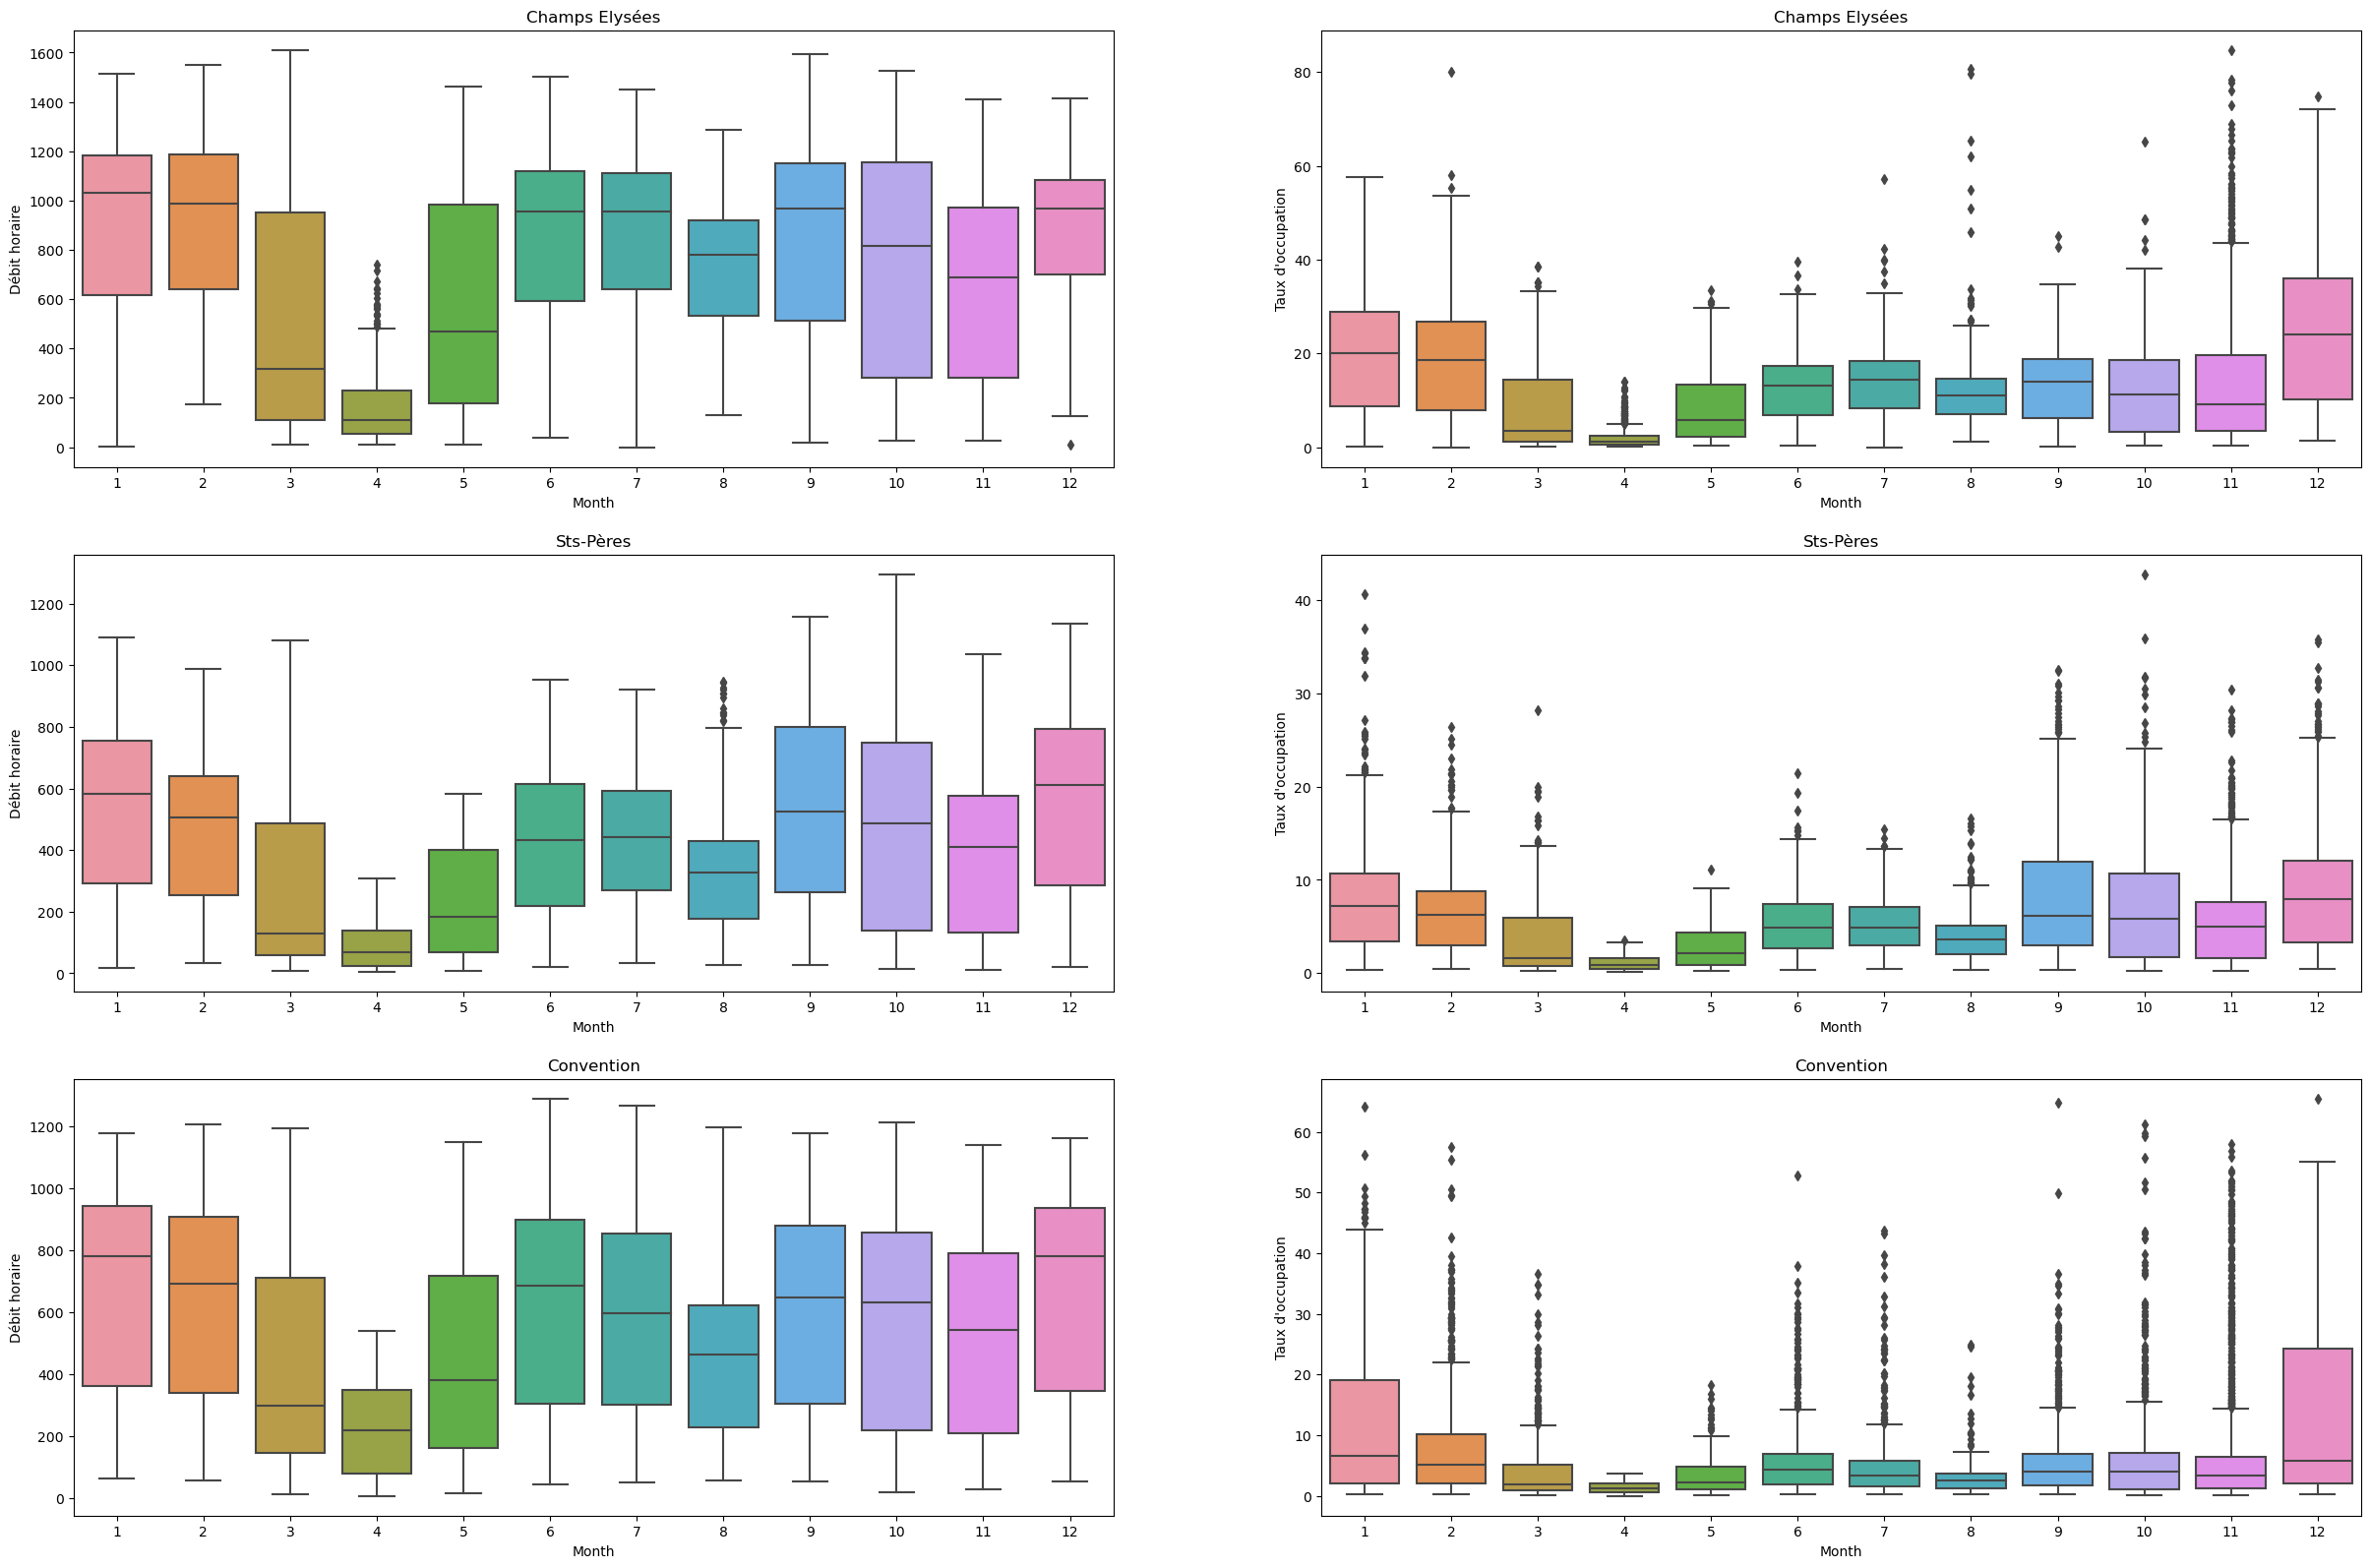

In [8]:
#Nous représentons ici un boxplot illustrant la distribution mensuelle des deux variables cibles
fig, axes = plt.subplots(ncols=2, nrows=len(df_set), figsize=(30, 20), dpi=100)
for i,df in enumerate((df_ACE, df_Sts, df_convention)):
    axes[i][0] = sns.boxplot(data=df, x='Month', y="Débit horaire", ax=axes[i][0])
    axes[i][0].set_ylabel('Débit horaire')
    axes[i][0].set_title(tagg[i])
    axes[i][1] = sns.boxplot(data=df, x='Month', y="Taux d'occupation",ax=axes[i][1])
    axes[i][1].set_ylabel("Taux d'occupation")
    axes[i][1].set_title(tagg[i])
plt.plot

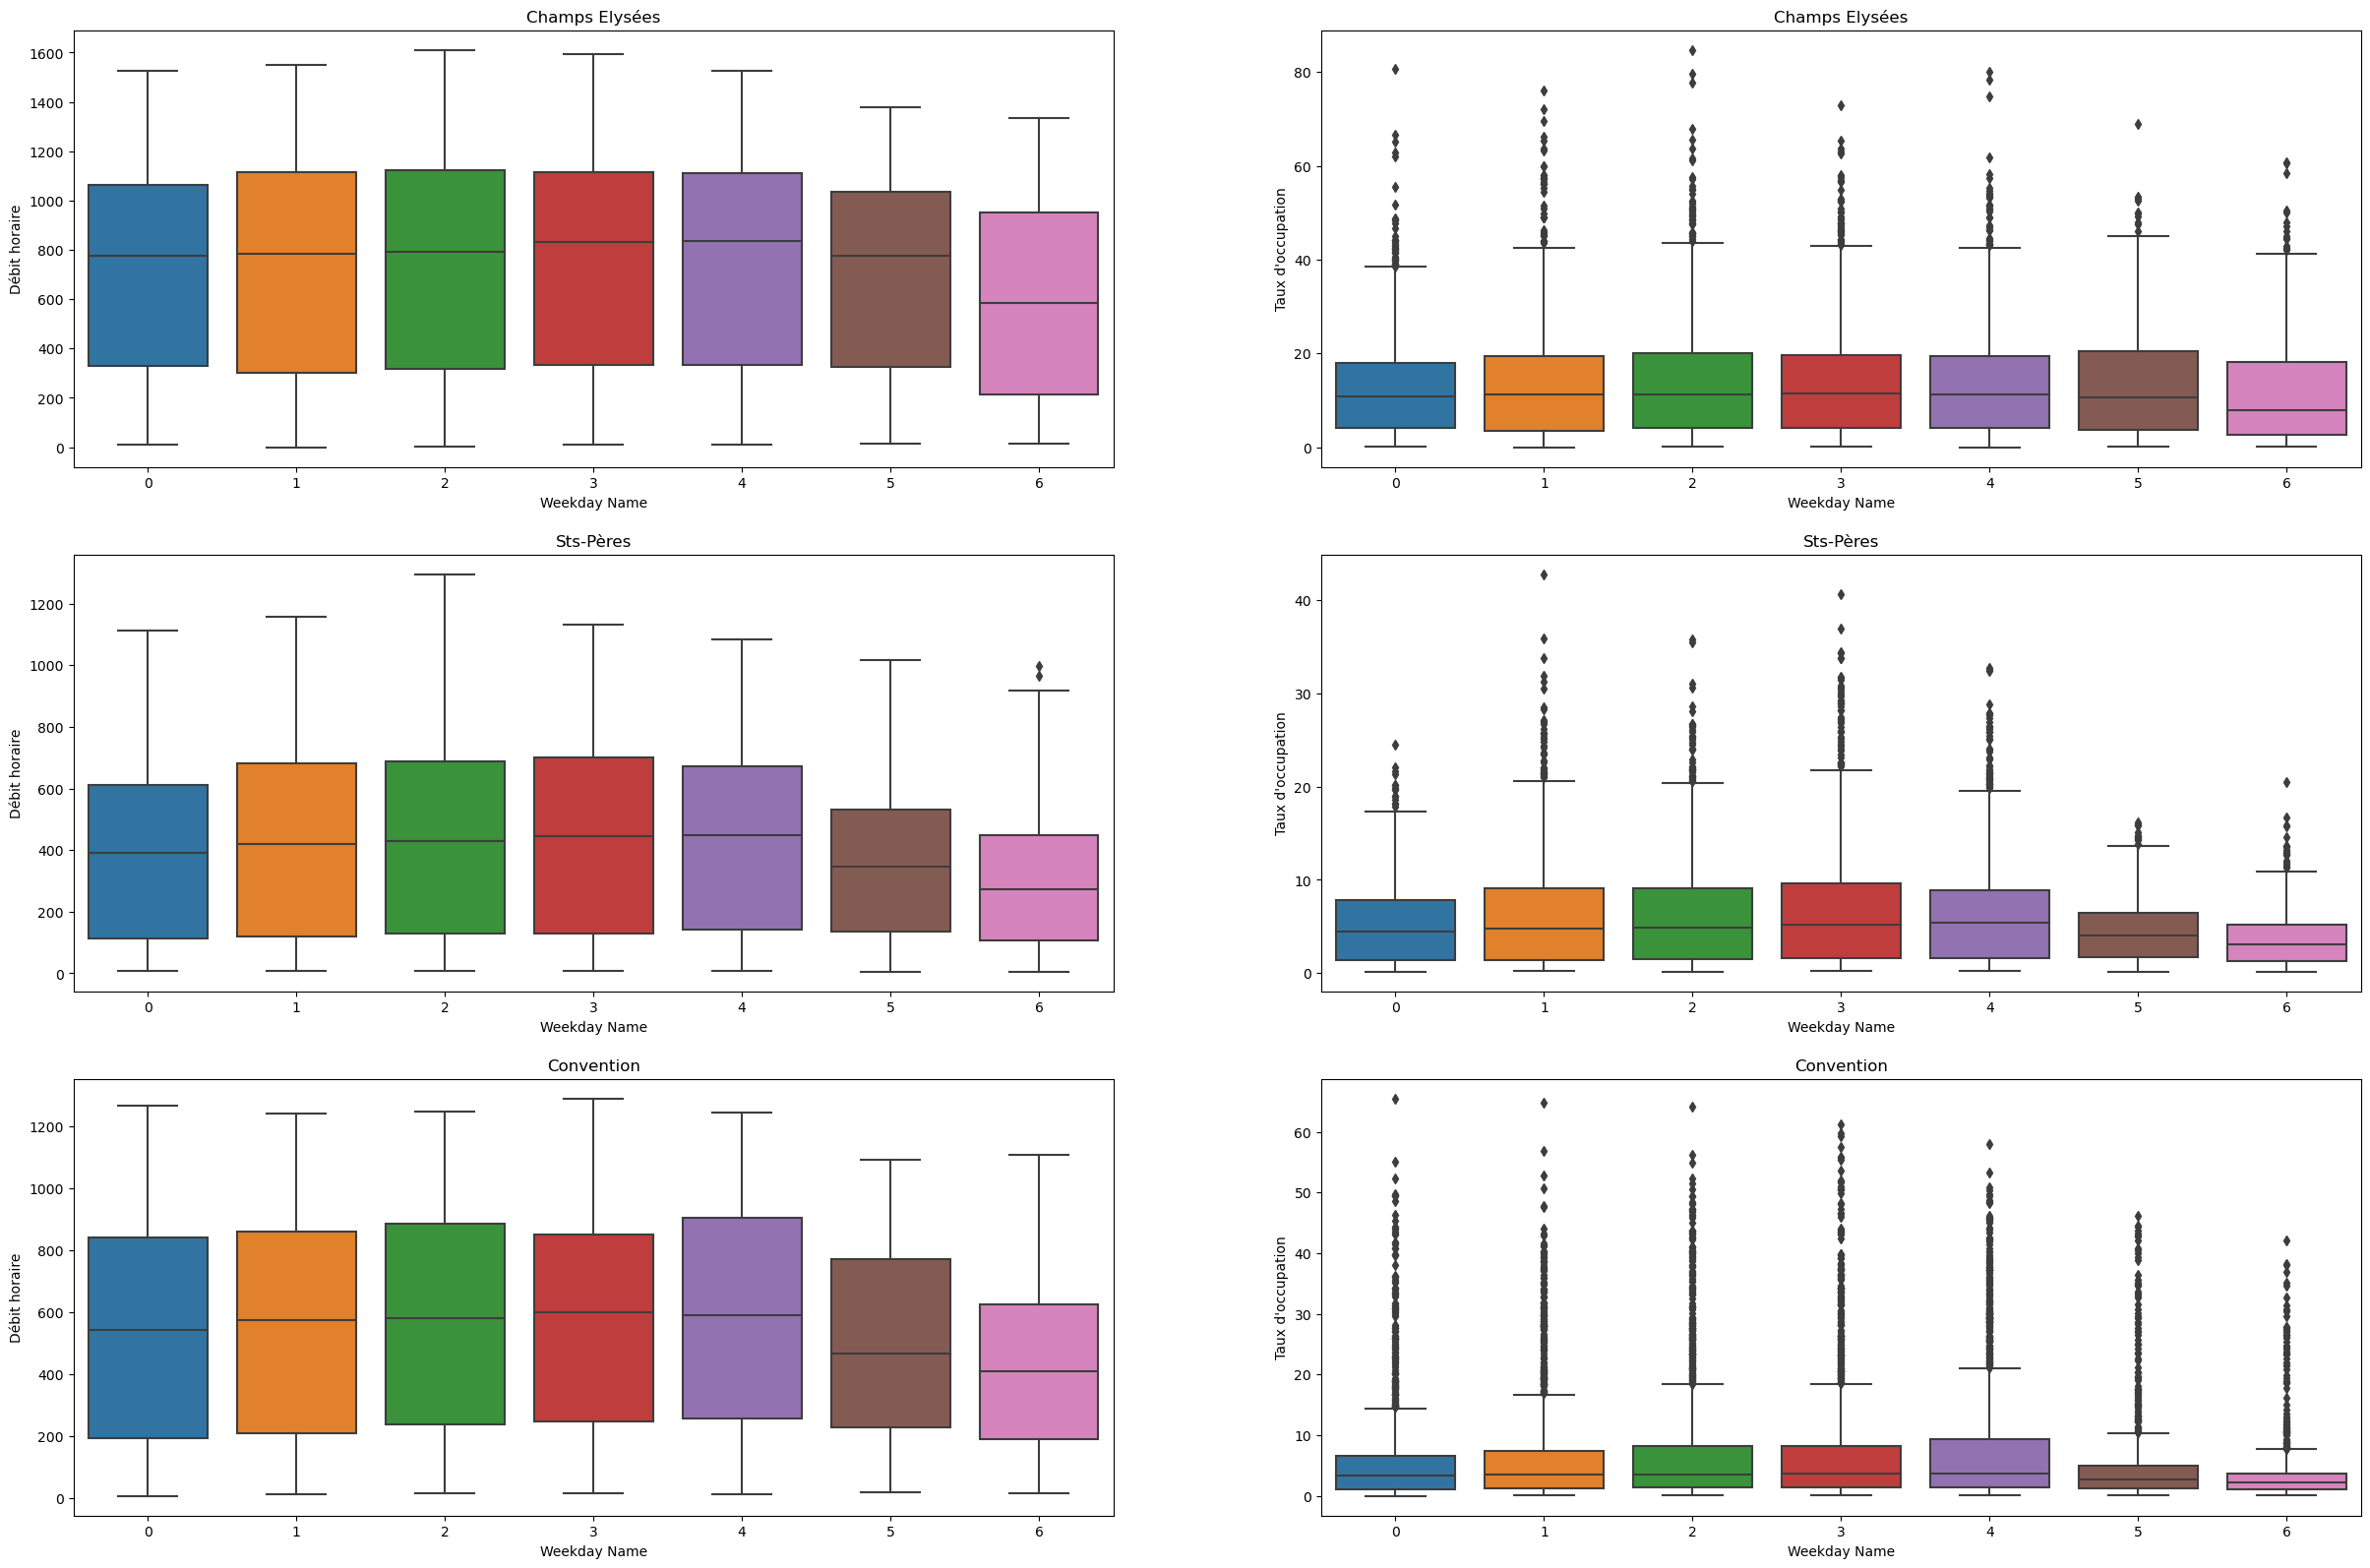

In [9]:
#et ici c'est un boxplot illustrant la distribution hebdomadaire des deux variables cibles
fig, axes = plt.subplots(ncols=2, nrows=len(df_set), figsize=(30, 20), dpi=100)
for i,df in enumerate((df_ACE, df_Sts, df_convention)):
    axes[i][0] = sns.boxplot(data=df, x='Weekday Name', y="Débit horaire", ax=axes[i][0])
    axes[i][0].set_ylabel("Débit horaire")
    axes[i][0].set_title(tagg[i])
    axes[i][1] = sns.boxplot(data=df, x='Weekday Name', y="Taux d'occupation",ax=axes[i][1])
    axes[i][1].set_ylabel("Taux d'occupation")
    axes[i][1].set_title(tagg[i])
plt.plot
plt.show()

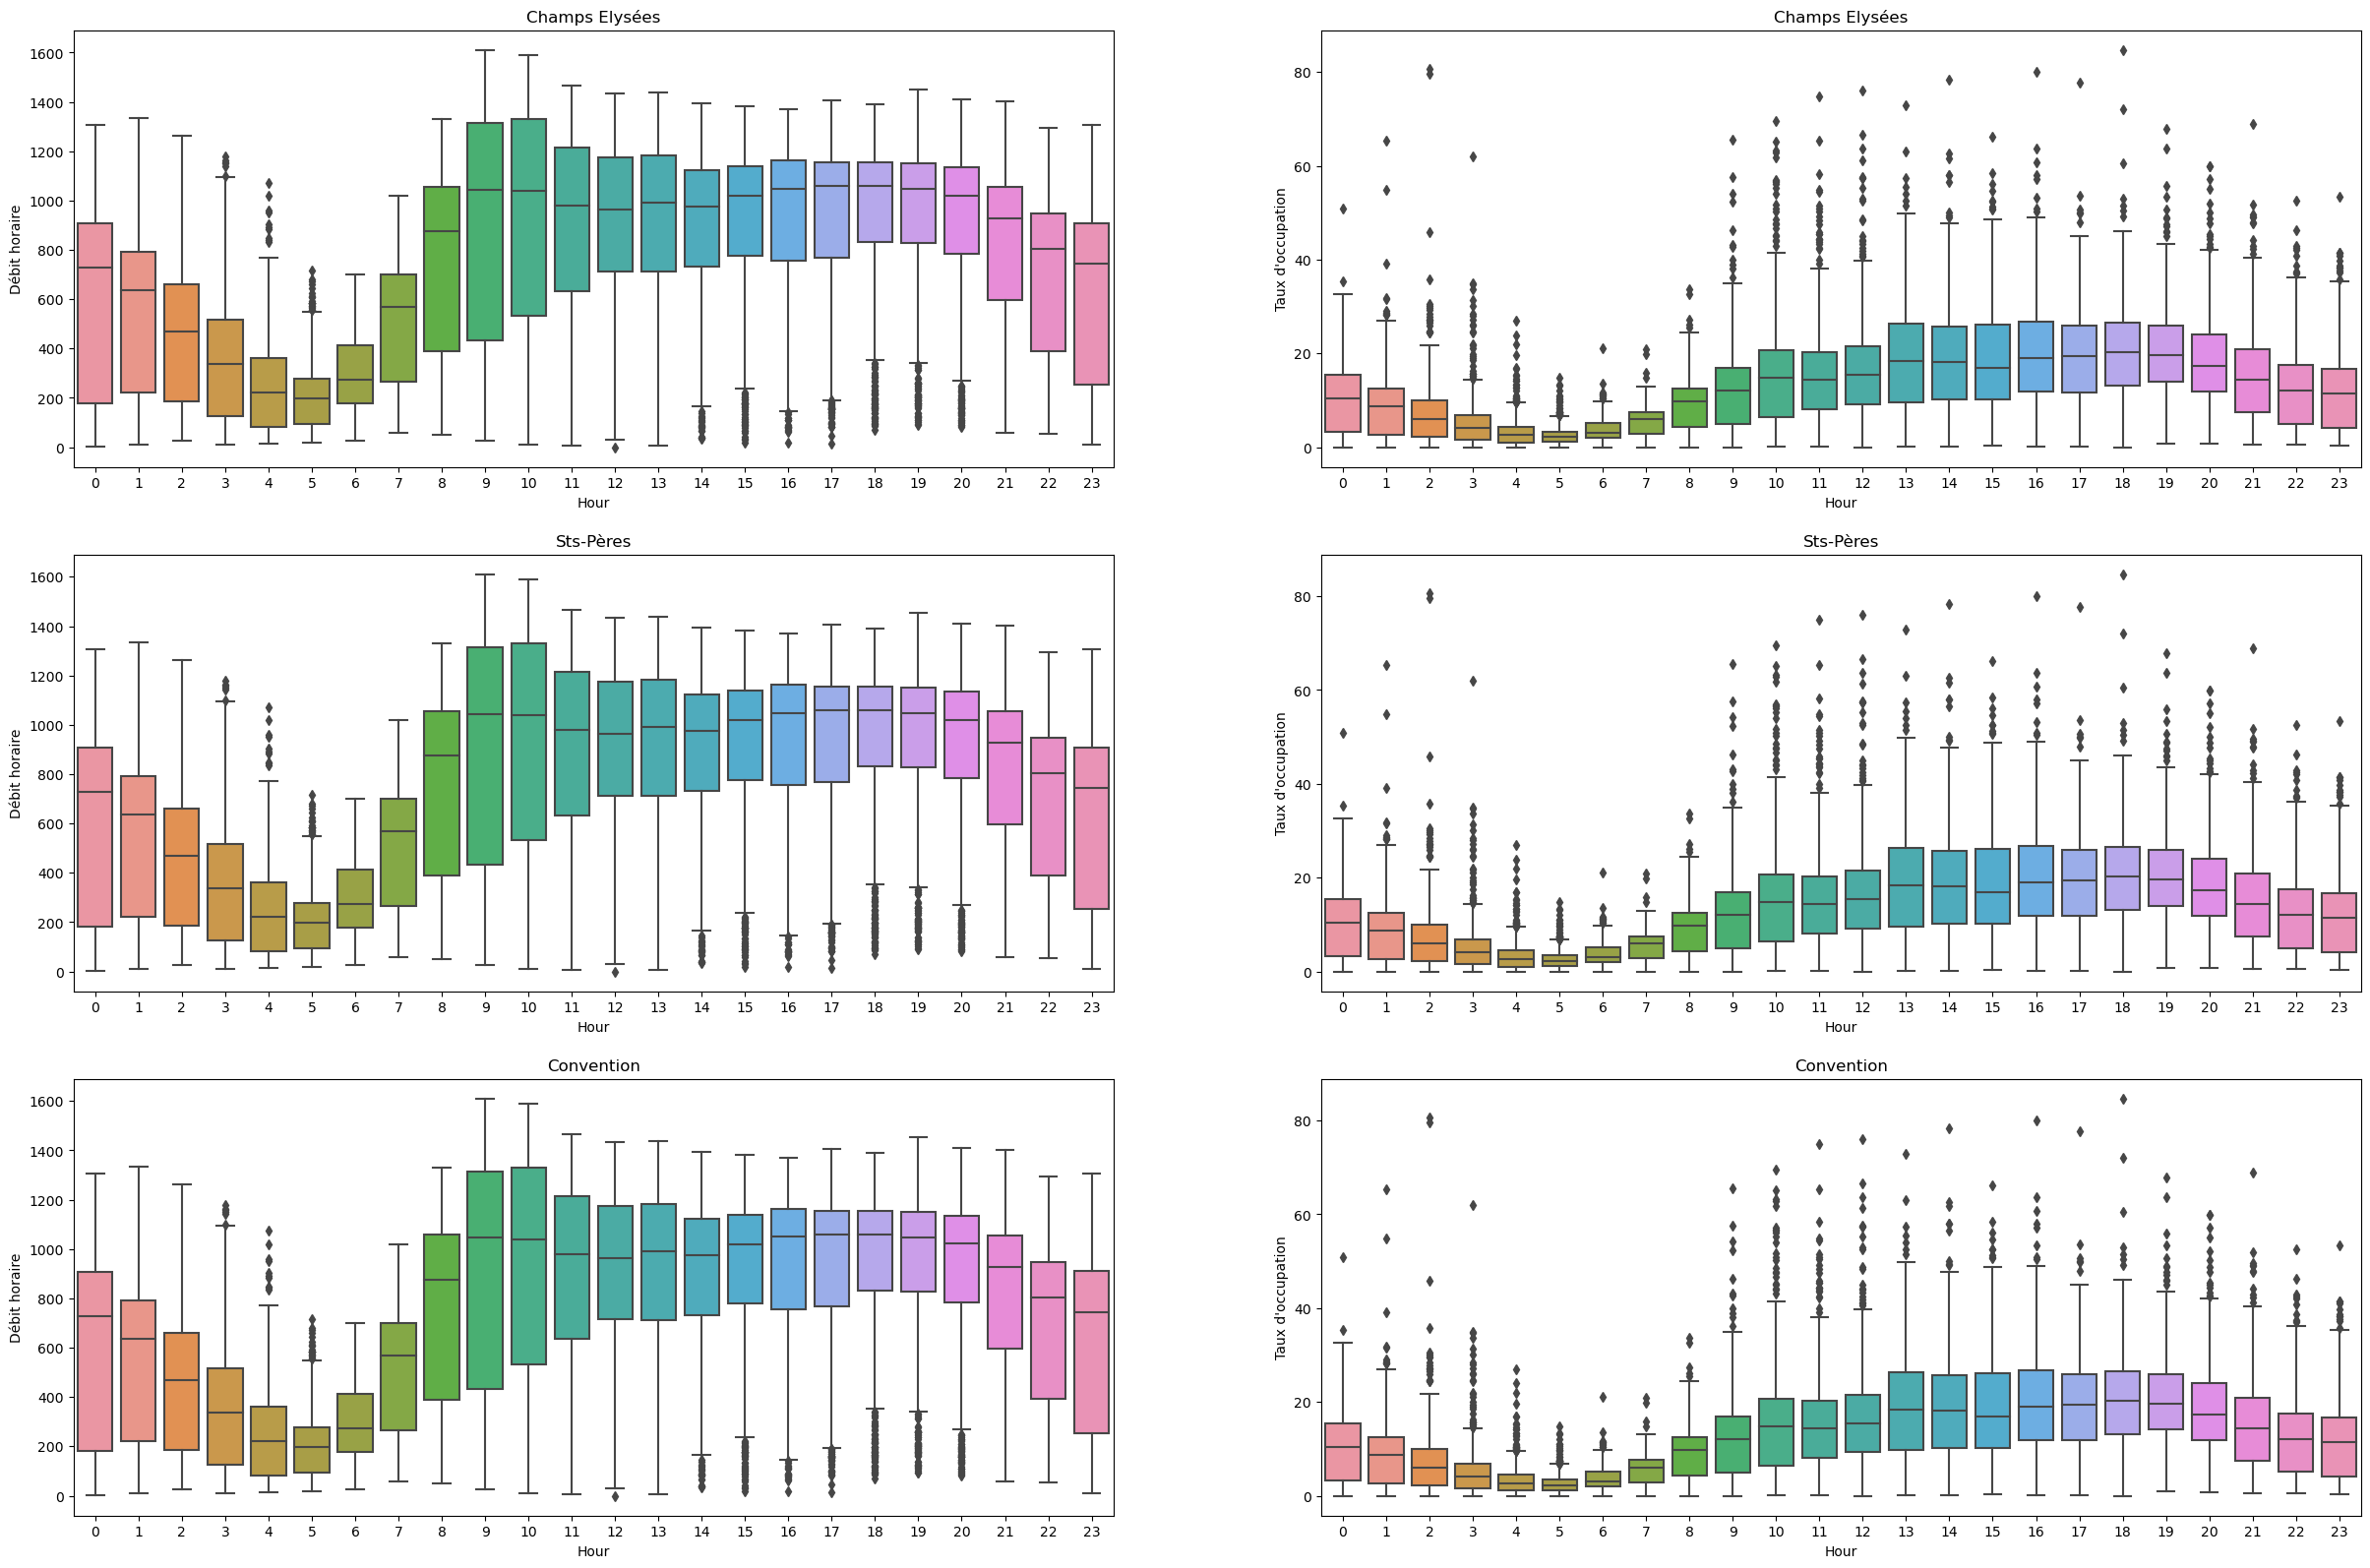

In [10]:
#et pour finir c'est un boxplot illustrant la distribution par heure des deux variables cibles
fig, axes = plt.subplots(ncols=2, nrows=len(df_set), figsize=(30, 20), dpi=100)
for i,df in enumerate((df_ACE, df_Sts, df_convention)):
    axes[i][0] = sns.boxplot(data=df_ACE, x='Hour', y="Débit horaire", ax=axes[i][0])
    axes[i][0].set_ylabel("Débit horaire")
    axes[i][0].set_title(tagg[i])
    axes[i][1] = sns.boxplot(data=df_ACE, x='Hour', y="Taux d'occupation",ax=axes[i][1])
    axes[i][1].set_ylabel("Taux d'occupation")
    axes[i][1].set_title(tagg[i])
plt.plot
plt.show()

In [12]:
#Nous précisons ici que la série temporelle possède une fréquence à l'heure et nous remplaçons les valeurs manquantes par
#la valeur qui les précèdent.

df_ACE = df_ACE.asfreq('H', method= 'ffill')
missing_df_1= df[df.isnull().any(1)]
print(missing_df_1)
df_ACE = df_ACE.dropna()

df_Sts = df_Sts.asfreq('H', method= 'ffill')
missing_df_2= df[df.isnull().any(1)]
print(missing_df_2)
df_Sts = df_Sts.dropna()

df_convention = df_convention.asfreq('H', method= 'ffill')
missing_df_3= df_convention[df_convention.isnull().any(1)]
print(missing_df_3)
df_convention = df_convention.dropna()

#Nous créons deux nouveaux datasets : un qui aggrège la donnée de charge de patient en moyennant par mois et un qui utilise
#la méhode de fenêtre glissante pour aggréger la donnée sans modifier sa fréquence.
df_weekly_mean = df_ACE.resample('W').mean()
df_7d= df_ACE.rolling("7D").mean()


                           Identifiant arc  Débit horaire  Taux d'occupation  \
Date et heure de comptage                                                      
2019-11-05 09:00:00                   5671            NaN                NaN   
2019-11-18 12:00:00                   5671            NaN                NaN   
2019-11-25 16:00:00                   5671            NaN                NaN   
2019-12-09 16:00:00                   5671            NaN                NaN   
2019-12-16 17:00:00                   5671            NaN                NaN   
...                                    ...            ...                ...   
2020-10-15 10:00:00                   5671            NaN                NaN   
2020-10-29 12:00:00                   5671            NaN                NaN   
2020-10-29 13:00:00                   5671            NaN                NaN   
2020-11-13 14:00:00                   5671            NaN                NaN   
2020-11-17 15:00:00                   56

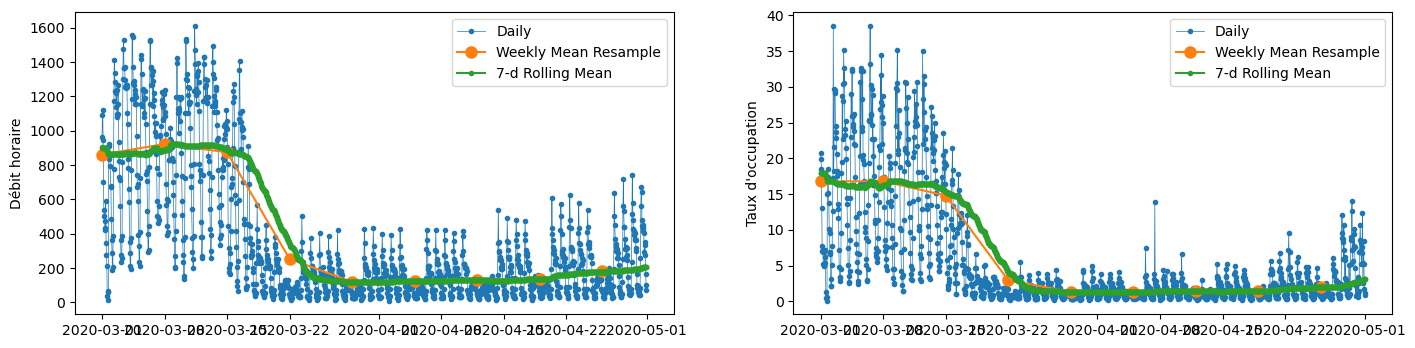

In [13]:
#Nous représentons ici la donnée des trois datasets créés (quotidien, mensuel et fenêtre glissante) et ce sur les 7 premiers 
#mois de l'année 2020. Cela permet de supprimer la grande variabilité quotidienne du dataset afin de mettre en lumière des 
#tendances plus générales.
start, end = '2020-03', '2020-04'
fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
axes[0].plot(df_ACE.loc[start:end,"Débit horaire"],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
axes[0].plot(df_weekly_mean.loc[start:end,"Débit horaire"],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
axes[0].plot(df_7d.loc[start:end, "Débit horaire"],
marker='.', linestyle='-', label='7-d Rolling Mean')
axes[0].set_ylabel("Débit horaire")
axes[0].legend();
axes[1].plot(df_ACE.loc[start:end,"Taux d'occupation"],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
axes[1].plot(df_weekly_mean.loc[start:end,"Taux d'occupation"],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
axes[1].plot(df_7d.loc[start:end, "Taux d'occupation"],
marker='.', linestyle='-', label='7-d Rolling Mean')
axes[1].set_ylabel("Taux d'occupation")
axes[1].legend();
plt.show()

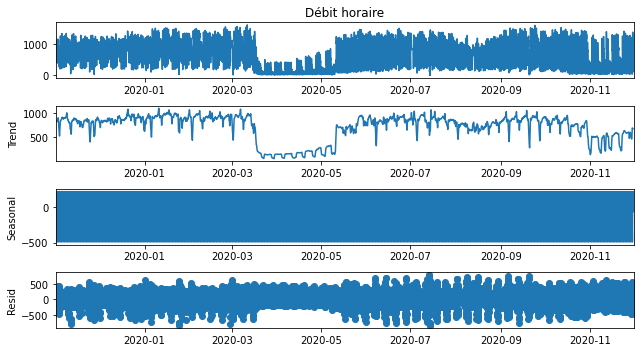

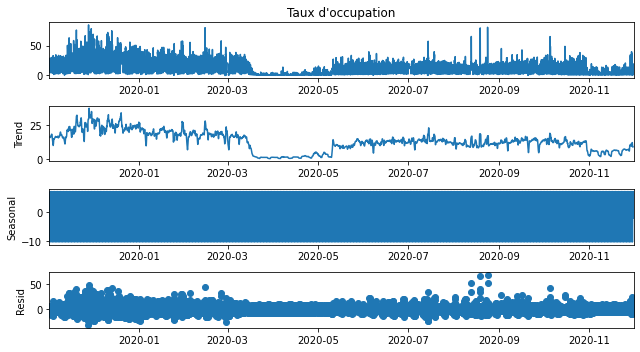

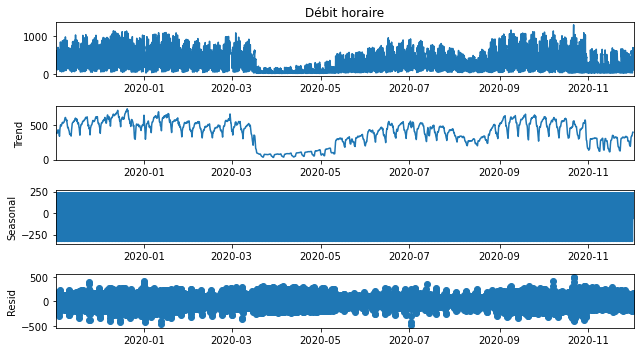

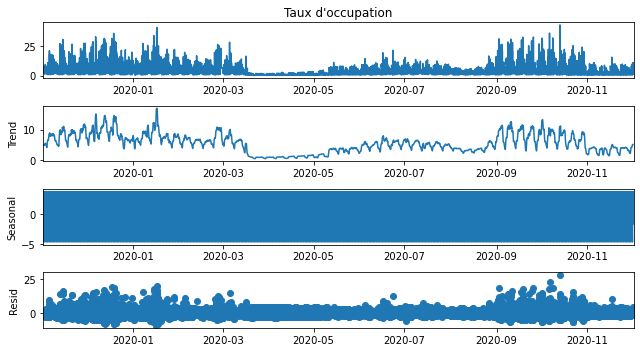

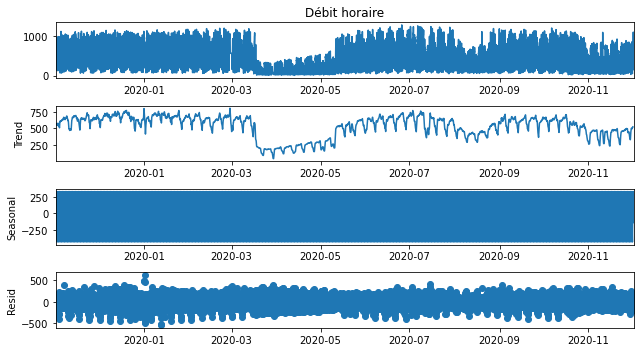

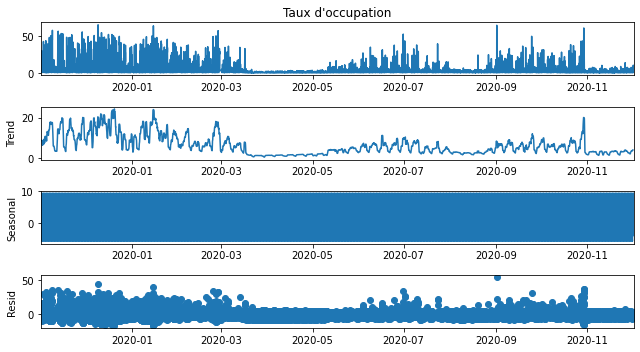

In [14]:
#Nous décomposons ici la série temporelle en isolant sa tendance, sa saisonnalité et ces résidus
import statsmodels.api as sm
import matplotlib
decomposition_1={}
decomposition_2={}
for i,df in enumerate((df_ACE, df_Sts, df_convention)):
    decomposition_1[i]= sm.tsa.seasonal_decompose(df["Débit horaire"], model = 'additive')
    decomposition_2[i]= sm.tsa.seasonal_decompose(df["Taux d'occupation"], model = 'additive')
    matplotlib.rcParams['figure.figsize']= [9.0,5.0]
    decomposition_1[i].plot()
    decomposition_2[i].plot()
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

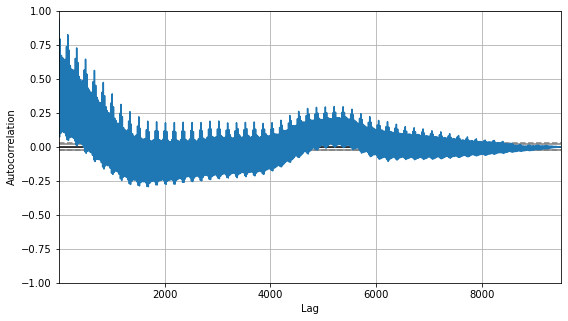

In [15]:
#Nous repésentons désormais le graphe d'autocorrélation de la série temporelle. Les lignes en poitillés délimite les valeurs 
#non significatives.
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_ACE["Débit horaire"])


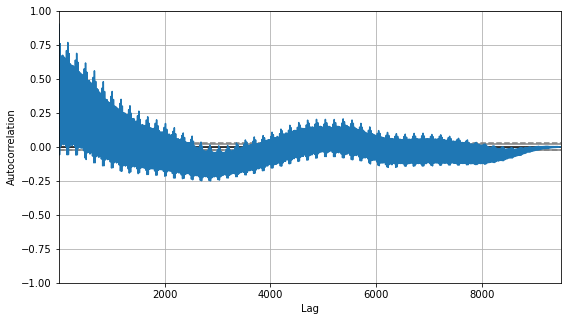

In [16]:
autocorrelation_plot(df_ACE["Taux d'occupation"])
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

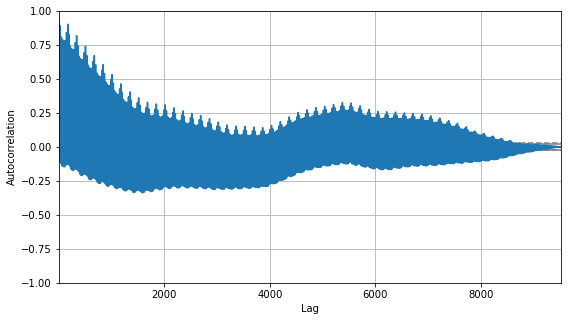

In [17]:
autocorrelation_plot(df_Sts["Débit horaire"])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

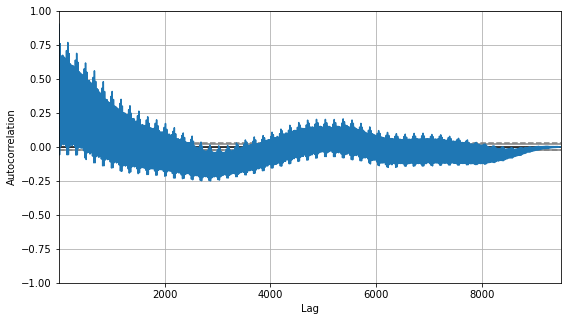

In [18]:
autocorrelation_plot(df_ACE["Taux d'occupation"])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

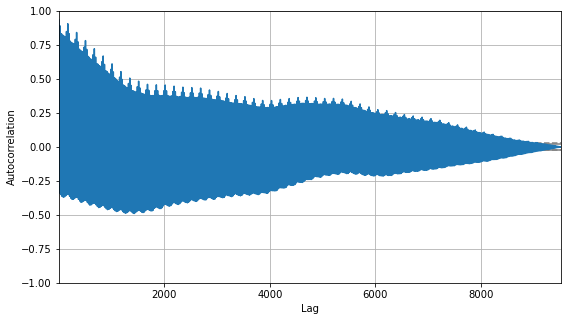

In [19]:
autocorrelation_plot(df_convention["Débit horaire"])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

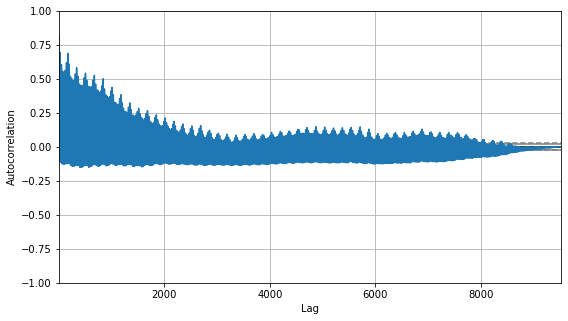

In [20]:
autocorrelation_plot(df_convention["Taux d'occupation"])

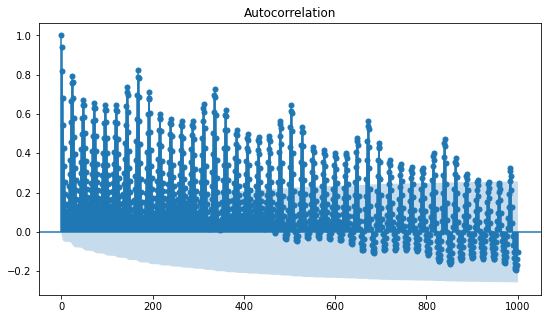

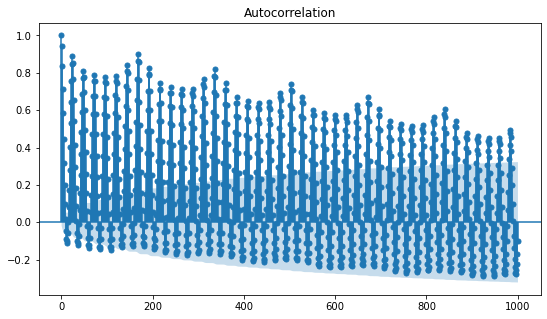

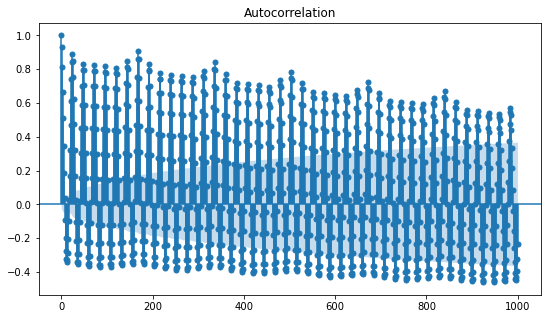

In [21]:
#Nous représentons ici l'autocorrélation de manière plus précise sur des délais plus courts qui correspondent aux valeurs 
#significatives du graphe précédent.
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_ACE["Débit horaire"], lags=1000)
plot_acf(df_Sts["Débit horaire"], lags=1000)
plot_acf(df_convention["Débit horaire"], lags=1000)
plt.show()

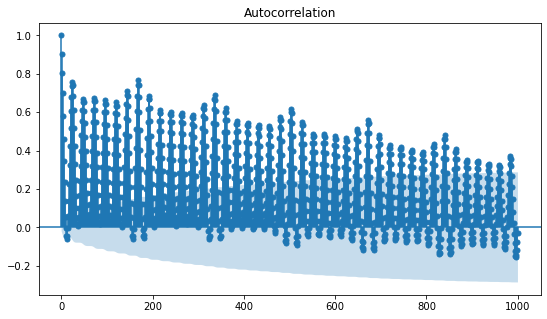

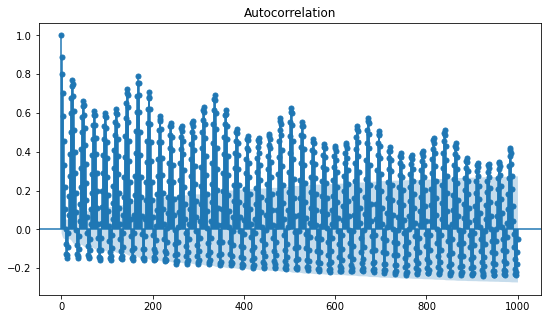

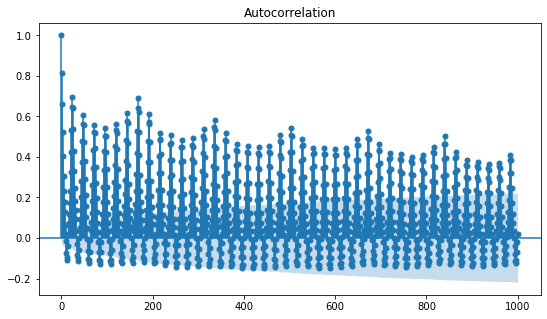

In [22]:
plot_acf(df_ACE["Taux d'occupation"], lags=1000)
plot_acf(df_Sts["Taux d'occupation"], lags=1000)
plot_acf(df_convention["Taux d'occupation"], lags=1000)
plt.show()